In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.xkcd()
%matplotlib inline

# Generating Power Law Distribution

In [8]:
# Generate uniform pseudorandom variables
r = np.random.random(10000)
alpha = 3.5
xmin = 1.0

# Get power law
x = (1 - r)**(-1.0/(alpha - 1)) * xmin

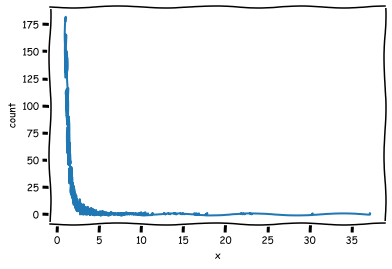

In [11]:
# Plot histogramm
yh, binEdges=np.histogram(x, bins=5000)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
plt.plot(bincenters, yh, '-', lw=2)
plt.ylabel('count')
plt.xlabel('x')
plt.show()

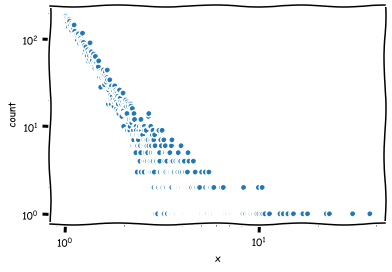

In [12]:
# Plot in log-log scale
plt.loglog(bincenters, yh, '.', lw=2)
plt.ylabel('count')
plt.xlabel('x')
plt.show()

# Exponent Estimation

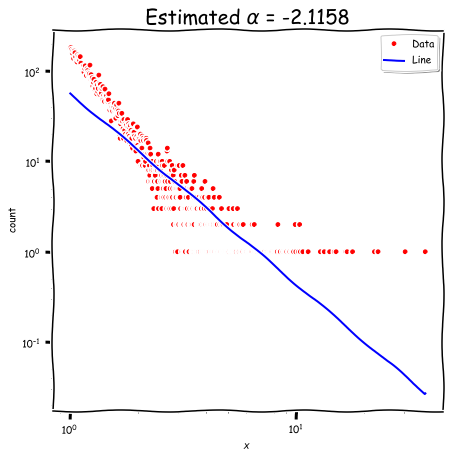

In [21]:
# Move zeros away!
idx = np.ix_(yh != 0) ## np.ix_
x_est = np.log(bincenters[idx])
y_est = np.log(yh[idx])
s = len(x_est)

# Do estimation
X = np.vstack([np.ones(s), x_est]).T
Beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y_est)

# Plot
idx = np.argsort(x_est)
yt = np.exp(X[idx,:].dot(Beta))
xt = np.exp(X[idx,1])

fig, ax = plt.subplots()
fig.set_size_inches(7,7)
ax.loglog(bincenters, yh, '.r', label='Data') 
ax.loglog(xt, yt, 'b', label='Line')
plt.ylabel('count')
plt.xlabel('$x$')
ax.legend(loc='upper right', shadow=True)
plt.title('Estimated $\\alpha$ = {0:1.4f}'.format(Beta[1]), fontsize=20)
plt.show()

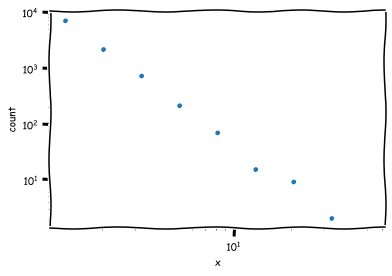

[ 9.45948147 -2.49807361]


In [22]:
# Binning
bins = np.logspace(0, 6, base = 2.0, num = 10)
yh, binEdges = np.histogram(x, bins)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])

# Plot
plt.loglog(bincenters, yh, '.', lw=2)
plt.ylabel('count')
plt.xlabel('x')
plt.show()

# Move zeros away!
idx = np.ix_(yh != 0)
x_est = np.log(bincenters[idx])
y_est = np.log(yh[idx])
s = len(x_est)

# Do estimation
X = np.vstack([np.ones(s), x_est]).T
Beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y_est)
print(Beta)